In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'Position_Salaries (1).csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
df = df.drop('Position', axis=1)

In [5]:
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [6]:
X = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [7]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [8]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
type(y)

pandas.core.series.Series

In [11]:
X = X.values
y = y.values

In [12]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [13]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linear_regression = LinearRegression()

In [16]:
linear_regression.fit(X, y)

LinearRegression()

In [17]:
y_predict = linear_regression.predict(X)

In [18]:
y_actual = pd.DataFrame(y)
y_predicted = pd.DataFrame(y_predict)

In [19]:
y_data = pd.DataFrame({'y_Actual': y, 'y_Predicted': y_predict, 'error': abs(y-y_predict)})

In [20]:
y_data

,y_Actual,y_Predicted,error
0,45000,-114454.545455,159454.545455
1,50000,-33575.757576,83575.757576
2,60000,47303.030303,12696.969697
3,80000,128181.818182,48181.818182
4,110000,209060.606061,99060.606061
5,150000,289939.393939,139939.393939
6,200000,370818.181818,170818.181818
7,300000,451696.969697,151696.969697
8,500000,532575.757576,32575.757576
9,1000000,613454.545455,386545.454545


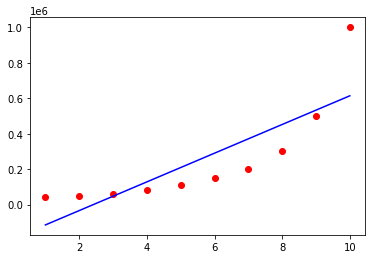

In [21]:
plt.scatter(X, y, color='r');
plt.plot(X, y_predict, color='b');

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
polynomial = PolynomialFeatures(degree = 4)
poly_features = polynomial.fit_transform(X)

In [24]:
poly_features

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [25]:
polynomial_regression = LinearRegression()
polynomial_regression.fit(poly_features, y)

LinearRegression()

In [26]:
y_poly_predict = polynomial_regression.predict(poly_features)

In [27]:
y_data = pd.DataFrame({'y_Actual': y, 'y_Predicted': y_predict, 'y_polynomial': y_poly_predict, 'error_1': abs(y-y_predict), 'error_2': abs(y-y_poly_predict)})

In [28]:
y_data

,y_Actual,y_Predicted,y_polynomial,error_1,error_2
0,45000,-114454.545455,53356.643357,159454.545455,8356.643357
1,50000,-33575.757576,31759.906760,83575.757576,18240.093240
2,60000,47303.030303,58642.191142,12696.969697,1357.808858
3,80000,128181.818182,94632.867133,48181.818182,14632.867133
4,110000,209060.606061,121724.941725,99060.606061,11724.941725
5,150000,289939.393939,143275.058275,139939.393939,6724.941725
6,200000,370818.181818,184003.496503,170818.181818,15996.503497
7,300000,451696.969697,289994.172494,151696.969697,10005.827506
8,500000,532575.757576,528694.638695,32575.757576,28694.638695
9,1000000,613454.545455,988916.083916,386545.454545,11083.916084


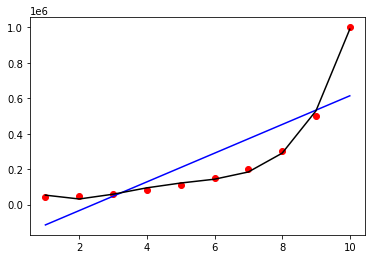

In [29]:
plt.scatter(X, y, color='r');
plt.plot(X, y_predict, color='b');
plt.plot(X, y_poly_predict, color='k');

In [30]:
X_grid = np.arange(min(X), max(X), 0.1)

In [31]:
X_grid

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [32]:
X_grid = X_grid.reshape((len(X_grid), 1))

In [33]:
X_grid_poly = polynomial.fit_transform(X_grid)

In [37]:
y_poly_predict = polynomial_regression.predict(X_grid_poly)
y_poly_predict_1 = polynomial_regression.predict(poly_features)

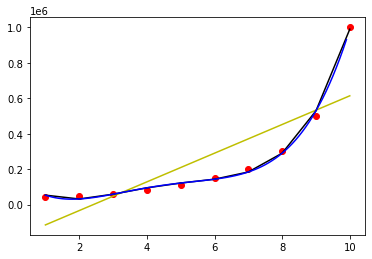

In [41]:
plt.scatter(X, y, color='r');
plt.plot(X, y_predict, color='y');
plt.plot(X, y_poly_predict_1, color='k');
plt.plot(X_grid, y_poly_predict, color='b');
